<a href="https://colab.research.google.com/github/swastikbanerjee/ML_Lab/blob/main/2348566_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Python Libraries

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler as scaler

Uploading CSV file

In [121]:
data=pd.read_csv('/content/Churn_Modelling.csv')

Data Cleaning

In [122]:
data.shape

(10000, 14)

In [123]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [124]:
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [126]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Data Analysis and Visualisation

In [127]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [128]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [129]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

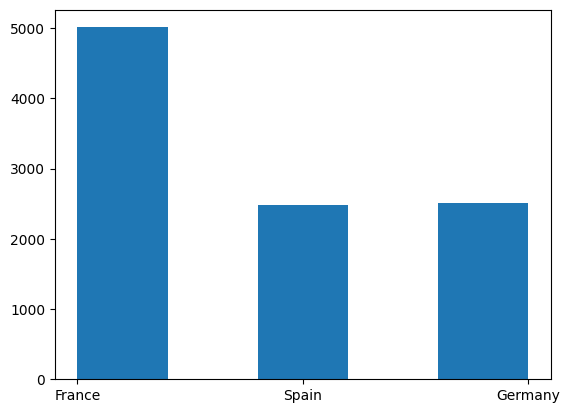

In [130]:
plt.hist(data['Geography'],bins=5);

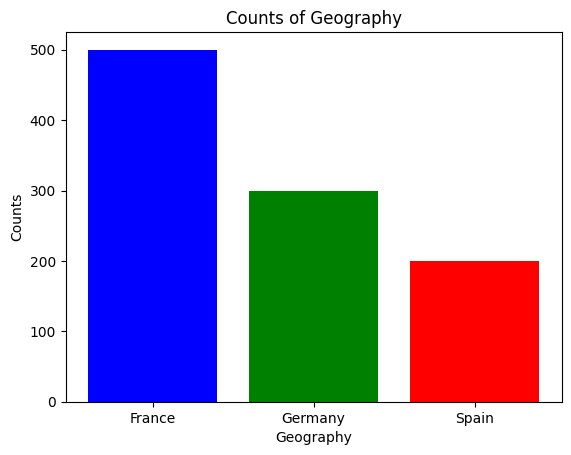

In [161]:
geography_counts = [500, 300, 200]
geography_labels = ['France', 'Germany', 'Spain']

plt.bar(geography_labels, geography_counts, color=['blue', 'green', 'red'])
plt.xlabel('Geography')
plt.ylabel('Counts')
plt.title('Counts of Geography')
plt.show()

Data Resampling

In [132]:
data_france=data[data['Geography']=='France']
data_france=resample(data_france,replace=False,n_samples=int(np.mean([len(data[data['Geography']=='Germany']),len(data[data['Geography']=='Spain'])])))

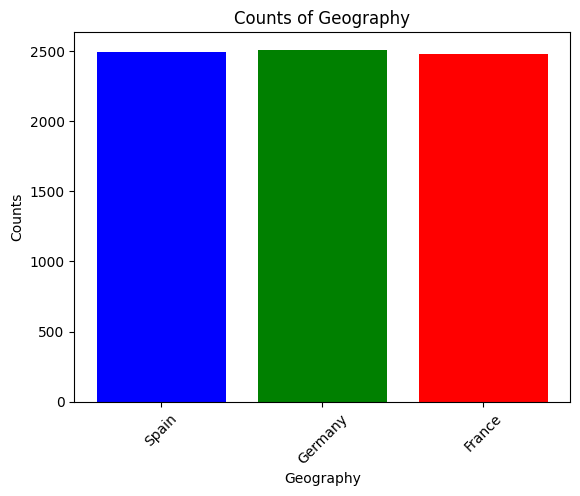

In [162]:
geography_counts = data.groupby('Geography').size().tolist()
geography_labels = data['Geography'].unique()

plt.bar(geography_labels, geography_counts, color=['blue', 'green', 'red'])
plt.xlabel('Geography')
plt.ylabel('Counts')
plt.title('Counts of Geography')
plt.xticks(rotation=45)
plt.show()


In [134]:
data['HasCrCard'].value_counts()

1    5236
0    2243
Name: HasCrCard, dtype: int64

(array([2243.,    0., 5236.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <BarContainer object of 3 artists>)

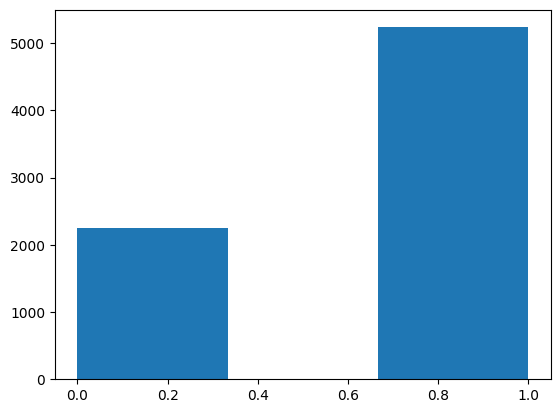

In [135]:
plt.hist(data['HasCrCard'],bins=3)

<Axes: xlabel='Exited', ylabel='HasCrCard'>

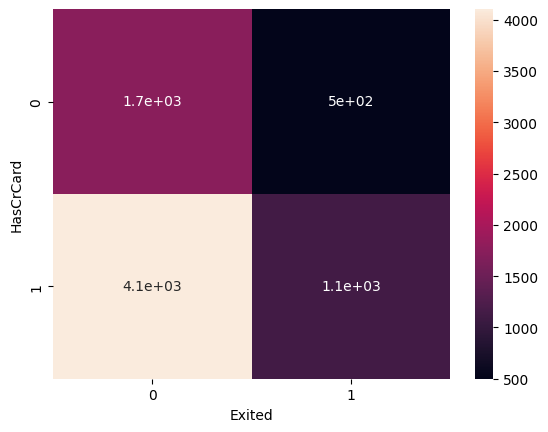

In [164]:
sns.heatmap(pd.crosstab(data['HasCrCard'],data['Exited']),annot=True)

In [137]:
data['IsActiveMember'].value_counts()

1    3867
0    3612
Name: IsActiveMember, dtype: int64

<Axes: xlabel='Exited', ylabel='IsActiveMember'>

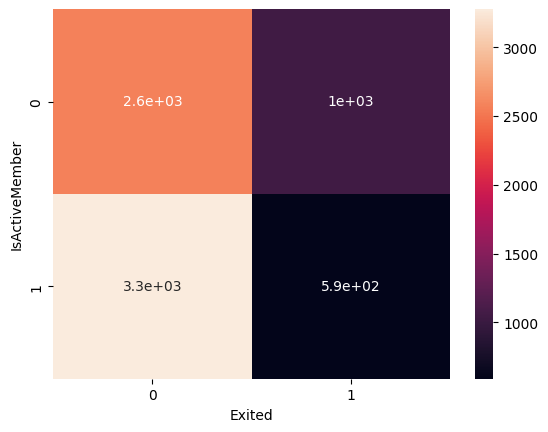

In [165]:
sns.heatmap(pd.crosstab(data['IsActiveMember'],data['Exited']),annot=True)

In [139]:
pd.crosstab(data['NumOfProducts'],data['Exited'])

Exited,0,1
NumOfProducts,,
1,2670,1121
2,3143,286
3,33,183
4,0,43


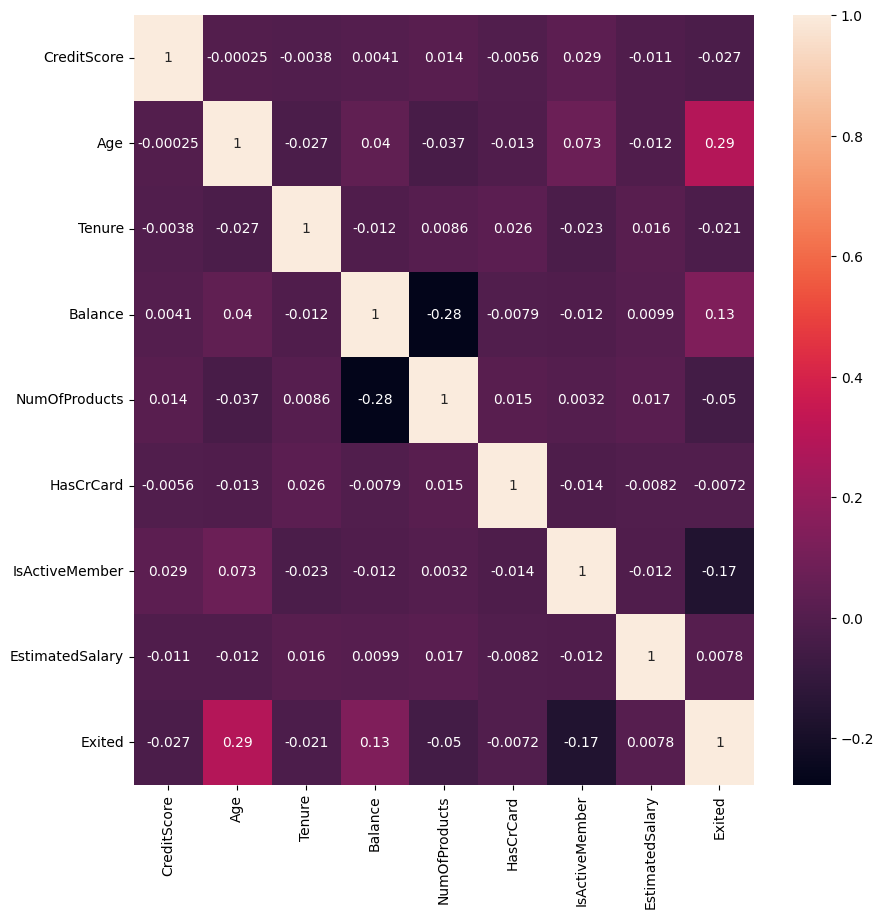

In [140]:
data_num=data.corr(numeric_only=True)
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(data_num,annot=True)
plt.show()

Splitting Dataset into Dependent and Independent Columns and then Scaling Values

In [141]:
X=data.iloc[:,:10]
Y=data.iloc[:,10]
scale=scaler()
X[['CreditScore','Age','Balance','EstimatedSalary']]=\
scale.fit_transform(X[['CreditScore','Age','Balance','EstimatedSalary']])

In [142]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1,0.516,Spain,Female,0.310811,1,0.334031,1,0,1,0.562709
4,1.000,Spain,Female,0.337838,2,0.500246,1,1,1,0.395400
5,0.590,Spain,Male,0.351351,8,0.453394,2,1,0,0.748797
7,0.052,Germany,Female,0.148649,4,0.458540,4,1,0,0.596733
11,0.294,Spain,Male,0.081081,3,0.000000,2,1,0,0.381929
...,...,...,...,...,...,...,...,...,...,...
5323,0.544,France,Male,0.189189,5,0.714653,1,1,1,0.745232
5816,0.394,France,Male,0.337838,1,0.368079,1,0,1,0.401295
1150,0.700,France,Female,0.121622,6,0.549877,1,0,0,0.044930
8783,0.864,France,Male,0.216216,9,0.000000,1,1,0,0.915135


Dimensionality Reduction using PCA

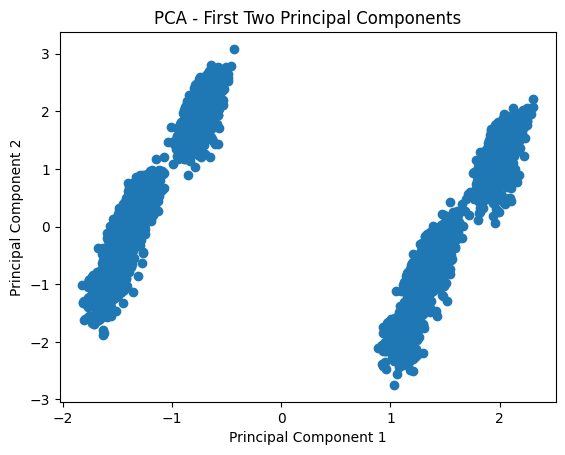

In [150]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA


categorical_columns = ['Geography', 'Gender']
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember','EstimatedSalary']

X_categorical = X[categorical_columns]
X_numerical = X[numerical_columns]

encoder = OneHotEncoder()
X_categorical_encoded = encoder.fit_transform(X_categorical)

scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

X_scaled = np.hstack((X_categorical_encoded.toarray(), X_numerical_scaled))

plt.scatter(*PCA(n_components=2).fit_transform(StandardScaler().fit_transform(X_scaled)).T)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Principal Components')
plt.show()



Feature Selection using PCA

In [163]:
n_components = min(X_scaled.shape[1], 10)
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_scaled)

explained_variance_ratios = pca.explained_variance_ratio_

feature_names = list(X.columns)

sorted_features = np.argsort(explained_variance_ratios)[::-1]

for i, feature_idx in enumerate(sorted_features):
    print(f"{i+1}. {feature_names[feature_idx]} - Explained Variance Ratio: {explained_variance_ratios[feature_idx]:.4f}")


1. CreditScore - Explained Variance Ratio: 0.1452
2. Geography - Explained Variance Ratio: 0.1200
3. Gender - Explained Variance Ratio: 0.1104
4. Age - Explained Variance Ratio: 0.1091
5. Tenure - Explained Variance Ratio: 0.1090
6. Balance - Explained Variance Ratio: 0.1054
7. NumOfProducts - Explained Variance Ratio: 0.1004
8. HasCrCard - Explained Variance Ratio: 0.0849
9. IsActiveMember - Explained Variance Ratio: 0.0538
10. EstimatedSalary - Explained Variance Ratio: 0.0362


Attributes with greater value of Variance Ratios are more relevant or important.